In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_OR = pd.read_csv('OR_load.csv', encoding = 'unicode_escape')

In [3]:
df_OR.head(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:
df_OR.shape

(541909, 8)

# EDA

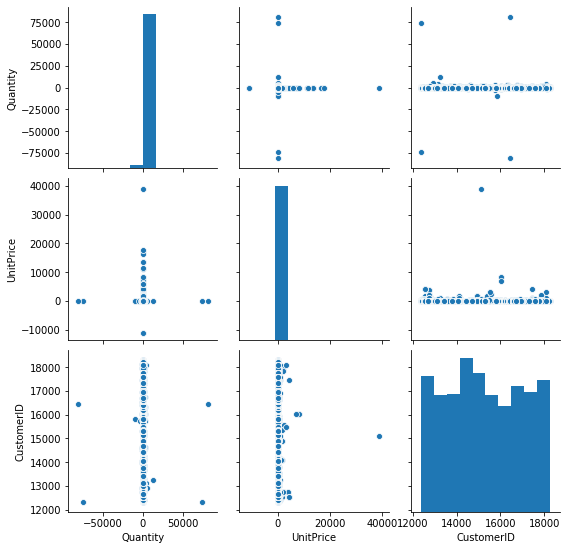

In [5]:
sns.pairplot(df_OR)

In [6]:
country_cust_data = df_OR[['Country','CustomerID']].drop_duplicates()
country_cust_data


,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0
...,...,...
536969,United Kingdom,13436.0
537255,United Kingdom,15520.0
538064,United Kingdom,13298.0
538812,United Kingdom,14569.0


## 4389 unique customers from above table 
### groupby is splitting of object, applying func and combining result

In [7]:
country_cust_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)


,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


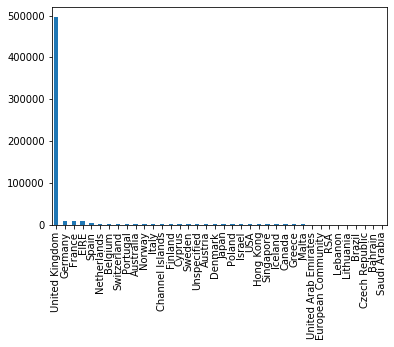

In [8]:
# plotting above data

df_OR['Country'].value_counts().plot.bar()

## majority of customers in this dataset are from UK
## removing the non significant data from dataset

In [9]:
# removing every country except UK

df_OR = df_OR.query("Country=='United Kingdom'").reset_index(drop=True)

In [10]:
# sum of miising values using .sum()

df_OR.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [11]:
#Remove missing values from CustomerID column
df_OR = df_OR[pd.notnull(df_OR['CustomerID'])]


In [12]:
# Number of negative values in Quantity
df_OR[(df_OR['Quantity']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
121,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
134,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
201,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
202,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
203,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
494133,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
495189,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
495363,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
495364,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [13]:
# removing negative quantity values
df_OR = df_OR[(df_OR['Quantity']>0)]


In [14]:
# use this to calculate Recency
df_OR['InvoiceDate'] = pd.to_datetime(df_OR['InvoiceDate'])


In [15]:
# use this in calculating Monetarity later
df_OR['TotalAmount'] = df_OR['Quantity'] * df_OR['UnitPrice']


In [16]:
df_OR.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [17]:
df_OR.shape

(354345, 9)

# Calculating RFM score

In [18]:
# Recency = Latest Date - Last Inovice Data
# Frequency = count of invoice no. of transaction(s)
# Monetary = Sum of total amount of each customer 

import datetime as dt
Latest_Date = dt.datetime(2011,12,10)
scores = df_OR.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days,
                                                'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})


In [19]:

scores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)


scores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [20]:
scores.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [21]:
scores.describe

<bound method NDFrame.describe of             Recency  Frequency  Monetary
CustomerID                              
12346.0         325          1  77183.60
12747.0           2        103   4196.01
12748.0           0       4596  33719.73
12749.0           3        199   4090.88
12820.0           3         59    942.34
...             ...        ...       ...
18280.0         277         10    180.60
18281.0         180          7     80.82
18282.0           7         12    178.05
18283.0           3        756   2094.88
18287.0          42         70   1837.28

[3921 rows x 3 columns]>

In [22]:
scores.Recency.describe()

count    3921.000000
mean       91.722265
std        99.528532
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

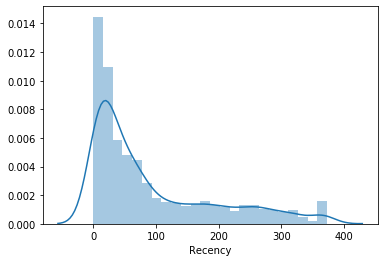

In [23]:
import seaborn as sns
x = scores['Recency']
graph_x = sns.distplot(x)

In [24]:
scores.Frequency.describe()


count    3921.000000
mean       90.371079
std       217.796155
min         1.000000
25%        17.000000
50%        41.000000
75%        99.000000
max      7847.000000
Name: Frequency, dtype: float64

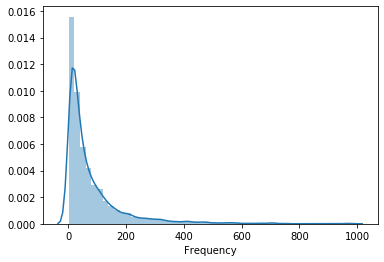

In [25]:
import seaborn as sns
x = scores.query('Frequency < 1000')['Frequency']
graph_x = sns.distplot(x)

In [26]:
scores.Monetary.describe()


count      3921.000000
mean       1863.910113
std        7481.922217
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.890000
max      259657.300000
Name: Monetary, dtype: float64

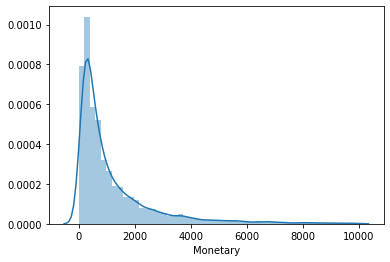

In [27]:
import seaborn as sns
x = scores.query('Monetary < 10000')['Monetary']

graph_x = sns.distplot(x)

In [28]:
# here we create 4 segments and divide our scores between them using funct
quantiles = scores.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.0,17.0,300.04
0.50,50.0,41.0,651.82
0.75,142.0,99.0,1575.89


In [29]:
# creating a nested dictionary using to_dict 
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 300.03999999999996, 0.5: 651.8199999999999, 0.75: 1575.89}}

In [30]:
#total score the lower the better
def RScores(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FandMScores(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [31]:
# function must be in such a way so that f and m return higher values for higher parameters passed while 
# r returns lower values for higher parameters passed.
scores['R'] = scores['Recency'].apply(RScores, args=('Recency',quantiles,))
scores['F'] = scores['Frequency'].apply(FandMScores, args=('Frequency',quantiles,))
scores['M'] = scores['Monetary'].apply(FandMScores, args=('Monetary',quantiles,))
scores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


In [32]:
scores['RFMScore'] = scores[['R', 'F', 'M']].sum(axis = 'columns')
scores.head()

,Recency,Frequency,Monetary,R,F,M,RFMScore
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,9
12747.0,2,103,4196.01,1,1,1,3
12748.0,0,4596,33719.73,1,1,1,3
12749.0,3,199,4090.88,1,1,1,3
12820.0,3,59,942.34,1,2,2,5


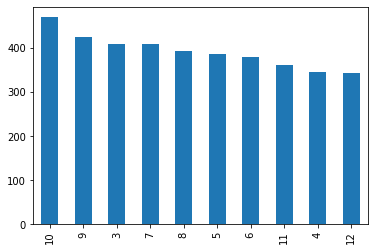

In [33]:
scores['RFMScore'].value_counts().plot.bar()

In [34]:
# customer tier list
Customer_Tier = ['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4']

In [35]:
# using binning to divide customers into different tiers with respect to their RFM score
Score_cuts = pd.qcut(scores.RFMScore,q =4 ,labels = Customer_Tier)
scores['Customer_Tier_Division'] = Score_cuts.values

In [36]:
scores.head(15)

,Recency,Frequency,Monetary,R,F,M,RFMScore,Customer_Tier_Division
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,9,Tier 3
12747.0,2,103,4196.01,1,1,1,3,Tier 1
12748.0,0,4596,33719.73,1,1,1,3,Tier 1
12749.0,3,199,4090.88,1,1,1,3,Tier 1
12820.0,3,59,942.34,1,2,2,5,Tier 1
12821.0,214,6,92.72,4,4,4,12,Tier 4
12822.0,70,46,948.88,3,2,2,7,Tier 2
12823.0,74,5,1759.50,3,4,1,8,Tier 2
12824.0,59,25,397.12,3,3,3,9,Tier 3


In [37]:
#Trying to transform monetary/frequency values into logarithmic values for easier scaling of data
#Changing negative and zero values to 1 so that they dont cause problems during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function  
scores['Recency'] = [handle_neg_n_zero(x) for x in scores.Recency]
scores['Monetary'] = [handle_neg_n_zero(x) for x in scores.Monetary]

#Performing Log transformation on scores DataFrame to bring data into normal or near normal distribution
Log_Transform_Data = scores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

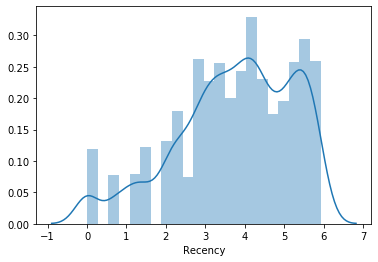

In [38]:
#Data distribution distplot after data normalization for Recency
Recency_Plot = Log_Transform_Data['Recency']
ax = sns.distplot(Recency_Plot)


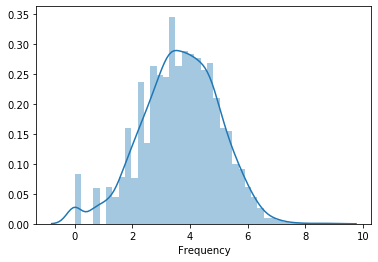

In [39]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Transform_Data.query('Frequency < 1000')['Frequency']
ax = sns.distplot(Frequency_Plot)


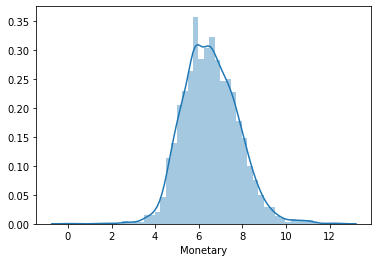

In [40]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Transform_Data.query('Monetary < 10000')['Monetary']
ax = sns.distplot(Monetary_Plot)


# Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale for more efficient clustering
scaleobj = StandardScaler()

Scaled_Data = scaleobj.fit_transform(Log_Transform_Data)
#StandardScaler follows Standard Normal Distribution (SND) and mean = 0 and scales the data to unit variance.

#Transform it back to dataframe called Scaled_Data 
Scaled_Data = pd.DataFrame(Scaled_Data, index = scores.index, columns = Log_Transform_Data.columns)


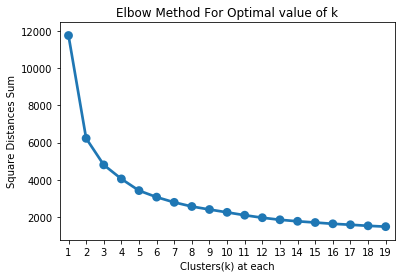

In [54]:
#Before applying KMeans to Scaled_Data DataFrame we find the k value
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,20):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Clusters(k) at each')
plt.ylabel('Square Distances Sum')
plt.title('Elbow Method For Optimal value of k')
plt.show()


In [43]:
#Since there is a drastic bend in elbow after k = 3 we take n_clusters=3
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
scores['Cluster'] = KMean_clust.labels_
scores.head()
#by default 3 clusters 0,1,2

,Recency,Frequency,Monetary,R,F,M,RFMScore,Customer_Tier_Division,Cluster
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,9,Tier 3,1
12747.0,2,103,4196.01,1,1,1,3,Tier 1,2
12748.0,1,4596,33719.73,1,1,1,3,Tier 1,2
12749.0,3,199,4090.88,1,1,1,3,Tier 1,2
12820.0,3,59,942.34,1,2,2,5,Tier 1,2


<Figure size 504x504 with 0 Axes>

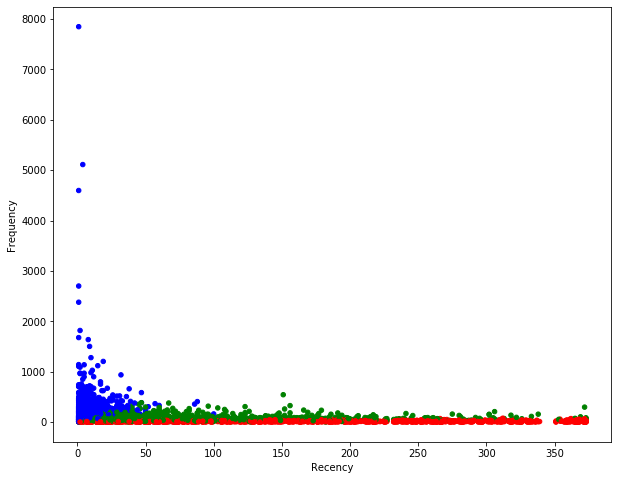

In [44]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
scores['Color'] = scores['Cluster'].map(lambda p: Colors[p])
ax = scores.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = scores['Color']
)


In [45]:
# a robust scaler would yield better result 
scores.head()


,Recency,Frequency,Monetary,R,F,M,RFMScore,Customer_Tier_Division,Cluster,Color
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,9,Tier 3,1,green
12747.0,2,103,4196.01,1,1,1,3,Tier 1,2,blue
12748.0,1,4596,33719.73,1,1,1,3,Tier 1,2,blue
12749.0,3,199,4090.88,1,1,1,3,Tier 1,2,blue
12820.0,3,59,942.34,1,2,2,5,Tier 1,2,blue


# Graph Representation of above data using Plotly and chart Studio using scatter plot

In [46]:
import plotly.offline as po
import plotly.graph_objs as gobj


In [55]:
#Recency vs Monetary
graph = scores.query("Monetary < 50000 and Frequency < 2000")
plot_data = [
    gobj.Scatter(
        x=graph.query("Customer_Tier_Division == 'Tier 4'")['Recency'],
        y=graph.query("Customer_Tier_Division == 'Tier 4'")['Frequency'],
        mode='markers',
        name='Tier 4',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("Customer_Tier_Division == 'Tier 3'")['Recency'],
        y=graph.query("Customer_Tier_Division == 'Tier 3'")['Frequency'],
        mode='markers',
        name='Tier 3',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("Customer_Tier_Division == 'Tier 2'")['Recency'],
        y=graph.query("Customer_Tier_Division == 'Tier 2'")['Frequency'],
        mode='markers',
        name='Tier 2',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("Customer_Tier_Division == 'Tier 1'")['Recency'],
        y=graph.query("Customer_Tier_Division == 'Tier 1'")['Frequency'],
        mode='markers',
        name='Tier 1',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Recency"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)


In [56]:
#Frequency Vs Monetary
#graph = scores.query("Monetary < 50000 and Frequency < 2000")
graph = scores
plot_data = [
    gobj.Scatter(
        x=graph.query("Customer_Tier_Division == 'Tier 4'")['Frequency'],
        y=graph.query("Customer_Tier_Division == 'Tier 4'")['Monetary'],
        mode='markers',
        name='Tier 4',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("Customer_Tier_Division == 'Tier 3'")['Frequency'],
        y=graph.query("Customer_Tier_Division == 'Tier 3'")['Monetary'],
        mode='markers',
        name='Tier 3',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("Customer_Tier_Division == 'Tier 2'")['Frequency'],
        y=graph.query("Customer_Tier_Division == 'Tier 2'")['Monetary'],
        mode='markers',
        name='Tier 2',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("Customer_Tier_Division == 'Tier 1'")['Frequency'],
        y=graph.query("Customer_Tier_Division == 'Tier 1'")['Monetary'],
        mode='markers',
        name='Tier 1',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)


In [57]:
#Recency Vs Monetary
graph = scores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("Customer_Tier_Division == 'Tier 4'")['Recency'],
        y=graph.query("Customer_Tier_Division == 'Tier 4'")['Monetary'],
        mode='markers',
        name='Tier 4',
        marker= dict(size= 25,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("Customer_Tier_Division == 'Tier 3'")['Recency'],
        y=graph.query("Customer_Tier_Division == 'Tier 3'")['Monetary'],
        mode='markers',
        name='Tier 3',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("Customer_Tier_Division == 'Tier 2'")['Recency'],
        y=graph.query("Customer_Tier_Division == 'Tier 2'")['Monetary'],
        mode='markers',
        name='Tier 2',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("Customer_Tier_Division == 'Tier 1'")['Recency'],
        y=graph.query("Customer_Tier_Division == 'Tier 1'")['Monetary'],
        mode='markers',
        name='Tier 1',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)



In [50]:
# graph of all the clusters we have made with their respective coordinates as recency and frequency 
graph = scores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("Cluster == 2")['Recency'],
        y=graph.query("Cluster == 2")['Frequency'],
        mode='markers',
        name='Cluster 3',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("Cluster == 1")['Recency'],
        y=graph.query("Cluster == 1")['Frequency'],
        mode='markers',
        name='Cluster 2',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("Cluster == 0")['Recency'],
        y=graph.query("Cluster == 0")['Frequency'],
        mode='markers',
        name='Cluster 1',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments created using K means'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)


# after clustering and graphical representation

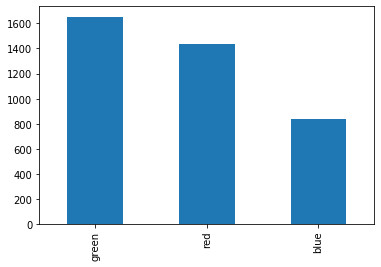

In [51]:
scores['Color'].value_counts().plot.bar()

In [52]:
scores.head()

,Recency,Frequency,Monetary,R,F,M,RFMScore,Customer_Tier_Division,Cluster,Color
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,9,Tier 3,1,green
12747.0,2,103,4196.01,1,1,1,3,Tier 1,2,blue
12748.0,1,4596,33719.73,1,1,1,3,Tier 1,2,blue
12749.0,3,199,4090.88,1,1,1,3,Tier 1,2,blue
12820.0,3,59,942.34,1,2,2,5,Tier 1,2,blue


In [53]:
scores[scores['Cluster'] == 1] 


,Recency,Frequency,Monetary,R,F,M,RFMScore,Customer_Tier_Division,Cluster,Color
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,9,Tier 3,1,green
12822.0,70,46,948.88,3,2,2,7,Tier 2,1,green
12824.0,59,25,397.12,3,3,3,9,Tier 3,1,green
12827.0,5,25,430.15,1,3,3,7,Tier 2,1,green
12830.0,37,38,6814.64,2,3,1,6,Tier 2,1,green
...,...,...,...,...,...,...,...,...,...,...
18259.0,24,42,2338.60,2,2,1,5,Tier 1,1,green
18260.0,172,134,2643.20,4,1,1,6,Tier 2,1,green
18263.0,25,61,1213.16,2,2,2,6,Tier 2,1,green
